In [121]:
import pandas as pd
import numpy as np
import matplotlib
#matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [122]:
# Pycharm configuration to display the whole dataframe printed in the "run" output.
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 10)

# Data extract and preprocessing

In [123]:
airbnb = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

In [124]:
print('number of samples: ',airbnb.shape[0])
print('number of columns: ',airbnb.shape[1])

number of samples:  48895
number of columns:  16


Check null values. Important questions when thinking about missing data:
1. How prevalent is the missing data?
2. Is missing data random or does it have a pattern?

In [125]:
print('Dataframe details: \n')
print(airbnb.info(verbose=True))
print('\nNull values in dataset:\n')
print(airbnb.isnull().sum().sort_values(ascending=False))
print('\nPercentage of null values in last_review column: ',round(airbnb['last_review'].isnull().sum()/len(airbnb)*100,2),'%')

Dataframe details: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review

From the above we can see both columns reviews_per_month and last_review have the same large amount of null values. Also number of null values for host_name and name are different, so maybe there is something worth exploring.

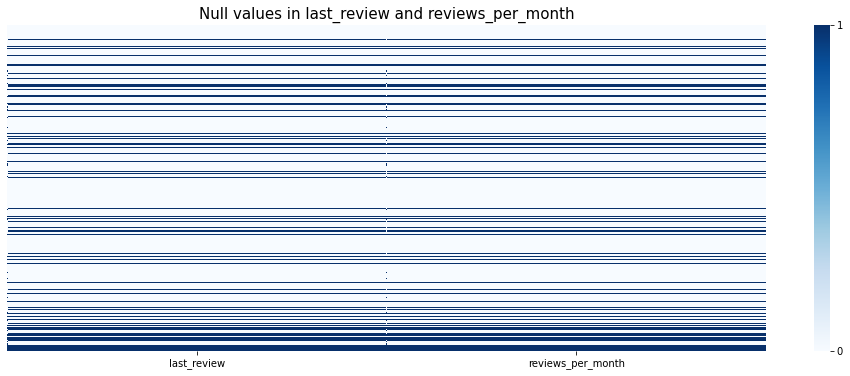

In [126]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Null values in last_review and reviews_per_month', fontsize=15)
sns.heatmap(airbnb[['last_review','reviews_per_month']].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})
plt.show()

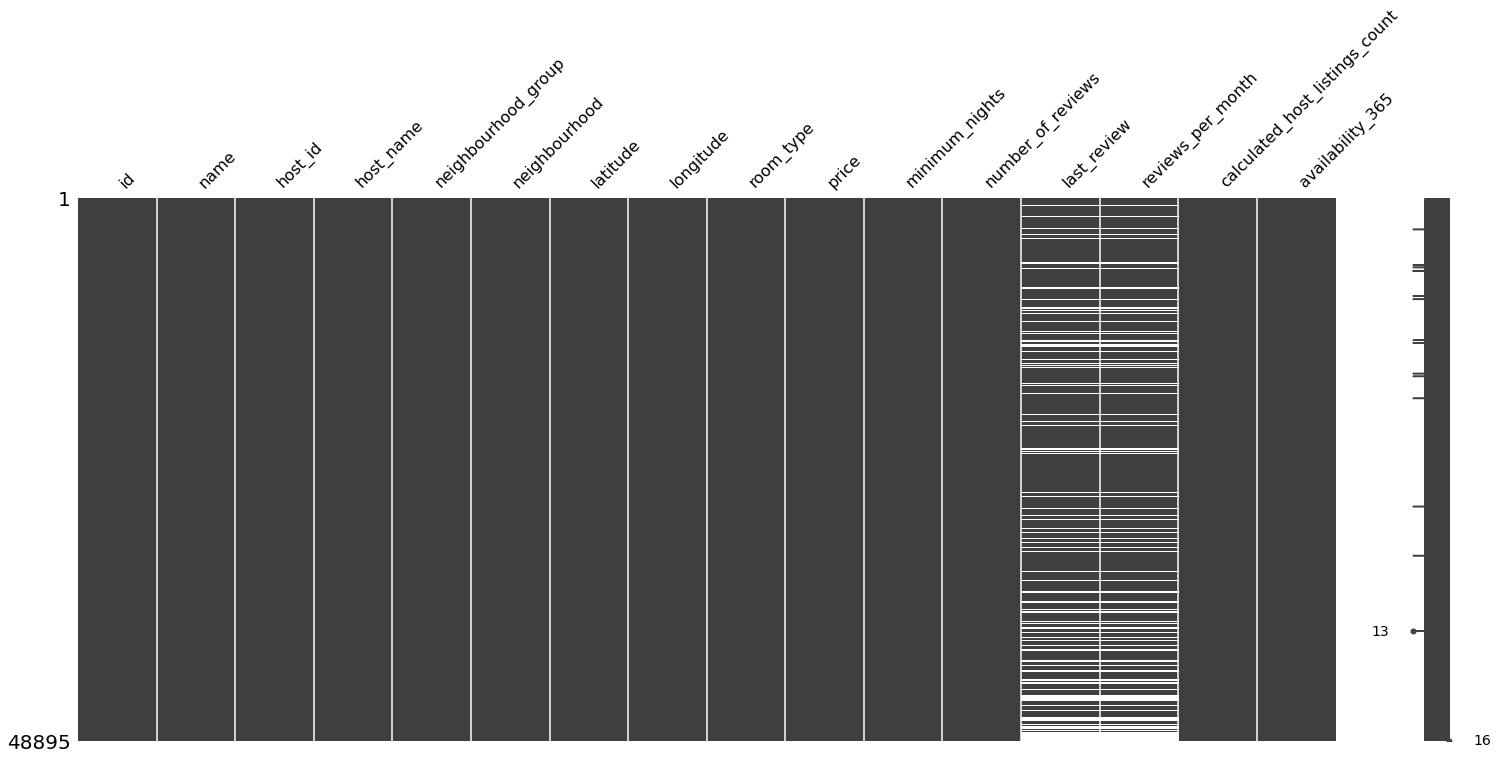

In [127]:
# Let's visualize the columns with missing values to see how they are distributed. 
msno.matrix(airbnb)
plt.show()

Using this matrix functionn we can very quickly find that reviews_per_month and last_review have a very similar pattern of missing values while missing values from host_name and name don't show such pattern



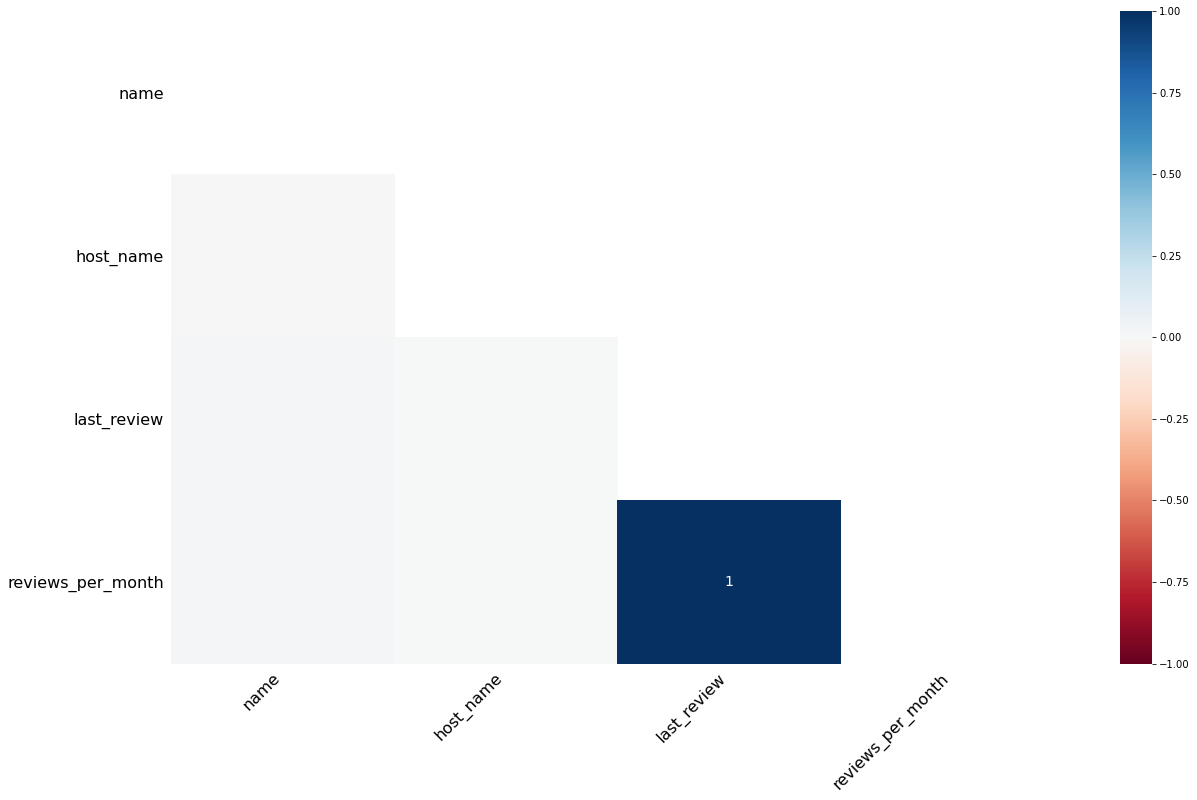

In [128]:
msno.heatmap(airbnb)
plt.show()

Using the heatmap function, we can tell correlation of missingness between reviews_per_month and last_review is 1, which means if one variable appears then the other variable is very likely to be present. 

In [129]:
# Also it seems column number_of_reviews usually has a value of 0 when last_review is null. So column last_review may be dropped
airbnb.drop('last_review',axis=1,inplace=True)

In [130]:
# And we can fillna the other columns that have null values
airbnb['reviews_per_month'].fillna(value=0,inplace=True)
airbnb['name'].fillna(value='$',inplace=True)
airbnb['host_name'].fillna(value='#',inplace=True)

In [131]:
# Check if all null values are handled
print('Null values in dataset:\n')
print(airbnb.isnull().sum().sort_values(ascending=False))
# Learn about dtypes of each feature in the dataframe
print('\nData types: \n')
print(airbnb.info(verbose=True))
# Generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution
print('\nData description: \n')
print(airbnb.describe())

Null values in dataset:

availability_365                  0
calculated_host_listings_count    0
reviews_per_month                 0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
neighbourhood_group               0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

Data types: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48895 non-null  object 
 2   host_id                         48895 non-null  i

# Visualization and analysis

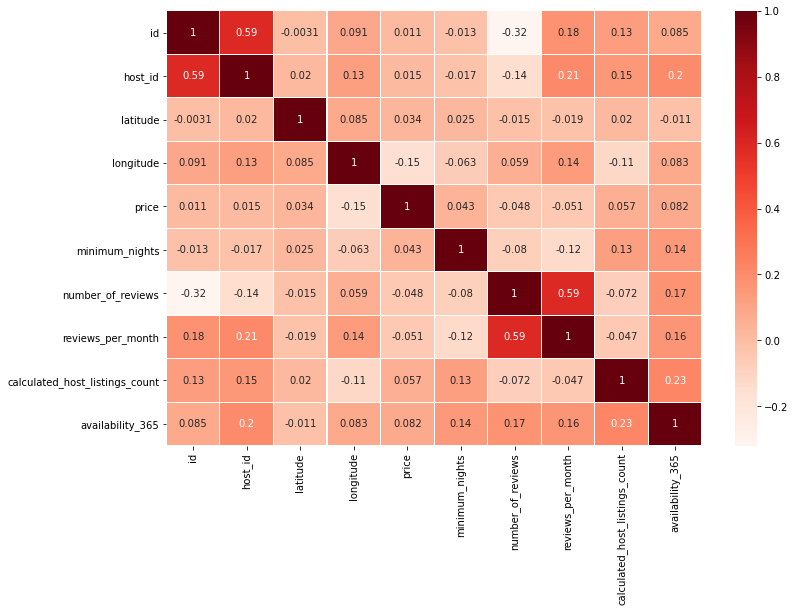

In [132]:
# A quick overview of correlations between features using heatmap
plt.figure(figsize=(12,8))
plt.xticks(rotation=45)
plt.yticks(rotation=45)
sns.heatmap(airbnb.corr(),annot=True,linewidths=0.1,cmap='Reds')

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64


Text(0.5, 1.0, 'No of Listings per Room Type')

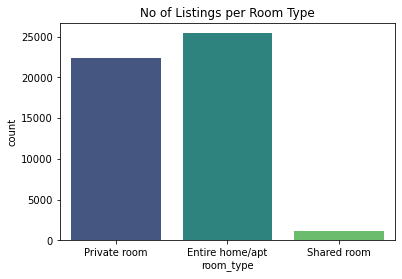

In [133]:
# Number of listings per room type
print(airbnb['room_type'].value_counts())
sns.countplot(x='room_type',data=airbnb,palette='viridis')
plt.title('No of Listings per Room Type')

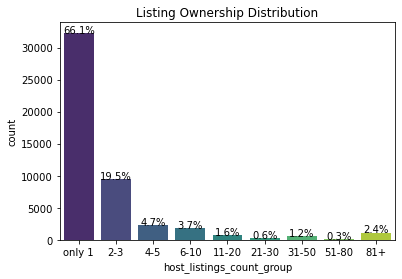

In [134]:
# Let's see how many listings a host usually has
def listing_count(count):
    if count == 1:
        return 'only 1'
    elif count<=3:
        return '2-3'
    elif count<=5:
        return '4-5'
    elif count<=10:
        return '6-10'
    elif count<=20:
        return '11-20'
    elif count<=30:
        return '21-30'
    elif count <= 50:
        return '31-50'
    elif count<=80:
        return '51-80'
    else:
        return '81+'
airbnb['host_listings_count_group'] = airbnb['calculated_host_listings_count'].apply(listing_count)
g = sns.countplot(x='host_listings_count_group',data=airbnb,order=['only 1','2-3','4-5','6-10','11-20','21-30','31-50','51-80','81+'],palette='viridis')
plt.title('Listing Ownership Distribution')
total = float(len(airbnb))
for p in g.patches:
    height = p.get_height()
    g.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:1.1f}%'.format(height / total*100),
            ha="center")

We can see 66% hosts usually have only 1 listing

(-1.144745117173943,
 1.9401765510245643,
 -1.2144094962916876,
 1.1079215714206239)

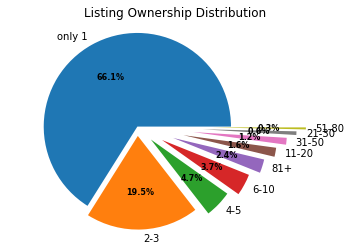

In [135]:
# We can change the above visualization to a pie chart just for practice purpose
listing_counts = airbnb.groupby('host_listings_count_group').agg('count')
label = listing_counts['id'].sort_values(ascending=False).index
size = listing_counts['id'].sort_values(ascending=False)
exp = (0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8)
fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(size, explode=exp, labels=label, autopct='%1.1f%%',shadow=False, startangle=0)
ax.set(title='Listing Ownership Distribution')
plt.setp(autotexts,size=8,weight="bold")
ax.axis('equal')

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64


Text(0.5, 1.0, 'No of Listings Per Neighborhood Group')

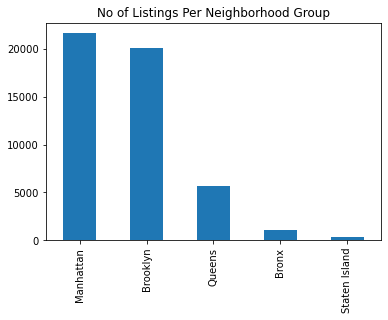

In [136]:
# number of listings per neighborhood groups
print(airbnb['neighbourhood_group'].value_counts(ascending=False))
airbnb['neighbourhood_group'].value_counts(ascending=False).plot.bar()
plt.title('No of Listings Per Neighborhood Group')

In [137]:
# top 3 neighborhoods with most number of listings in each neighborhood groups
for group_name in airbnb['neighbourhood_group'].unique():
    neighbor = airbnb[airbnb['neighbourhood_group']==group_name]['neighbourhood'].value_counts(ascending=False)[:3]
    print('{} top 3 neighborhoods with corresponding count of listings:\n{} \n'.format(group_name,neighbor))

Brooklyn top 3 neighborhoods with corresponding count of listings:
Williamsburg          3920
Bedford-Stuyvesant    3714
Bushwick              2465
Name: neighbourhood, dtype: int64 

Manhattan top 3 neighborhoods with corresponding count of listings:
Harlem             2658
Upper West Side    1971
Hell's Kitchen     1958
Name: neighbourhood, dtype: int64 

Queens top 3 neighborhoods with corresponding count of listings:
Astoria             900
Long Island City    537
Flushing            426
Name: neighbourhood, dtype: int64 

Staten Island top 3 neighborhoods with corresponding count of listings:
St. George       48
Tompkinsville    42
Stapleton        27
Name: neighbourhood, dtype: int64 

Bronx top 3 neighborhoods with corresponding count of listings:
Kingsbridge    70
Fordham        63
Longwood       62
Name: neighbourhood, dtype: int64 



Text(0.5, 1.0, 'Number of listings in each neighborhood per room types')

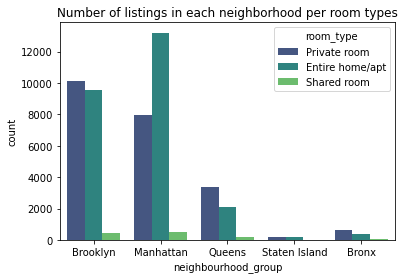

In [138]:
# number of listings per neighborhood group, categorized by room type
sns.countplot(x='neighbourhood_group',data=airbnb,hue='room_type',palette='viridis')
plt.title('Number of listings in each neighborhood per room types')

In [139]:
# number of listings per neighborhood, categorized by room type, sort in DESC order by count of listings
listing_per_neighbor = airbnb.groupby(['room_type','neighbourhood'],sort=False)['id'].agg([('count','count')]).reset_index().sort_values(by=['room_type','count'],ascending=[True,False])
print(listing_per_neighbor)

           room_type       neighbourhood  count
13   Entire home/apt        Williamsburg   1891
18   Entire home/apt  Bedford-Stuyvesant   1591
39   Entire home/apt     Upper East Side   1310
10   Entire home/apt     Upper West Side   1256
21   Entire home/apt      Hell's Kitchen   1187
..               ...                 ...    ...
532      Shared room      Pelham Gardens      1
533      Shared room            Longwood      1
534      Shared room       Randall Manor      1
536      Shared room           Bronxdale      1
537      Shared room     Stuyvesant Town      1

[540 rows x 3 columns]


In [140]:
# top 10 neighborhoods with most number of listings per each room type
top10 = listing_per_neighbor.groupby(['room_type']).apply(lambda x: x.nlargest(10,'count'))
print(top10)

                           room_type       neighbourhood  count
room_type                                                      
Entire home/apt 13   Entire home/apt        Williamsburg   1891
                18   Entire home/apt  Bedford-Stuyvesant   1591
                39   Entire home/apt     Upper East Side   1310
                10   Entire home/apt     Upper West Side   1256
                21   Entire home/apt      Hell's Kitchen   1187
                22   Entire home/apt        East Village   1170
                1    Entire home/apt             Midtown   1100
                30   Entire home/apt              Harlem   1036
                38   Entire home/apt             Chelsea    820
                16   Entire home/apt       Crown Heights    759
Private room    6       Private room  Bedford-Stuyvesant   2038
                37      Private room        Williamsburg   1997
                49      Private room            Bushwick   1719
                2       Private room    

Text(0.5, 1.0, 'Shared room')

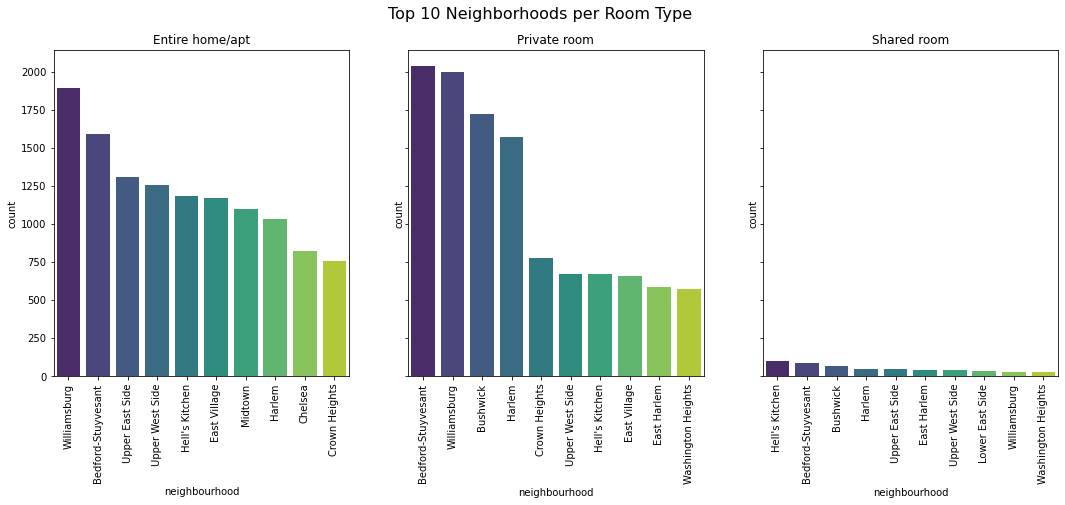

In [170]:
# visualize top 10 neighborhoods per each room type
fig,axes = plt.subplots(nrows=1,ncols=3,sharey=True,figsize=(18,6))
fig.suptitle('Top 10 Neighborhoods per Room Type', fontsize=16)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Entire home/apt'],ax=axes[0],palette='viridis')
axes[0].set_title('Entire home/apt')
sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Private room'],ax=axes[1],palette='viridis')
axes[1].set_title('Private room')
sns.barplot(x='neighbourhood',y='count',data=top10[top10['room_type']=='Shared room'],ax=axes[2],palette='viridis')
axes[2].set_title('Shared room')

Text(0.5, 1.0, 'Price Distribution per Neighborhood Group')

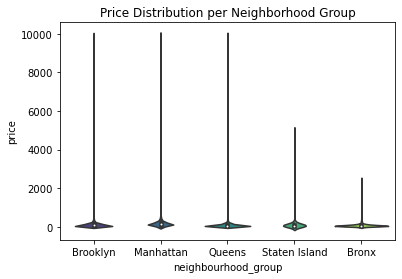

In [142]:
# price distribution per neighborhood group, a quick overview
sns.violinplot(x='neighbourhood_group',y='price',data=airbnb,palette='viridis')
plt.title('Price Distribution per Neighborhood Group')

Text(0.5, 1.0, 'Price Distribution per Neighborhood Group')

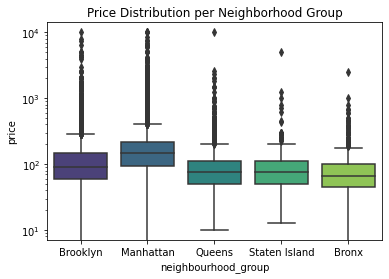

In [143]:
# let's get rid of the long tails and take a closer look
g = sns.boxplot(x='neighbourhood_group',y='price',data=airbnb,palette='viridis')
g.set(yscale='log')
plt.title('Price Distribution per Neighborhood Group')

In [144]:
# detailed price statistics in each neighborhood group, for example min/max, 25/50/75 percentile
price_stat = pd.DataFrame()
for group in airbnb['neighbourhood_group'].unique():
    prices = airbnb[airbnb['neighbourhood_group']==group][['price']]
    stats = prices.describe(percentiles=[.25,.5,.75])
    stats = stats.iloc[1:]
    stats.reset_index(inplace=True)
    stats.rename(columns={'index': 'Stats','price': group}, inplace=True)
    #print(stats)
    price_stat = pd.concat([price_stat,stats],axis=1)
price_stat = price_stat.loc[:,~price_stat.columns.duplicated()].set_index('Stats')
print(price_stat)

           Brooklyn     Manhattan        Queens  Staten Island        Bronx
Stats                                                                      
mean     124.383207    196.875814     99.517649     114.812332    87.496792
std      186.873538    291.383183    167.102155     277.620403   106.709349
min        0.000000      0.000000     10.000000      13.000000     0.000000
25%       60.000000     95.000000     50.000000      50.000000    45.000000
50%       90.000000    150.000000     75.000000      75.000000    65.000000
75%      150.000000    220.000000    110.000000     110.000000    99.000000
max    10000.000000  10000.000000  10000.000000    5000.000000  2500.000000


In [145]:
# average price of listings in each neighborhood
price_by_nei = airbnb.groupby(['neighbourhood_group','neighbourhood'],sort=False)['price'].agg([('price_avg','mean')]).reset_index().sort_values(by=['neighbourhood_group','price_avg'],ascending=[True,False])
highest10 = price_by_nei.groupby(['neighbourhood_group']).apply(lambda x: x.nlargest(10,'price_avg'))
print(highest10)

                        neighbourhood_group       neighbourhood   price_avg
neighbourhood_group                                                        
Bronx               138               Bronx           Riverdale  442.090909
                    120               Bronx         City Island  173.000000
                    92                Bronx      Spuyten Duyvil  154.750000
                    58                Bronx         Eastchester  141.692308
                    213               Bronx           Unionport  137.142857
                    209               Bronx  Westchester Square  122.200000
                    175               Bronx          West Farms  122.000000
                    156               Bronx            Van Nest  113.818182
                    57                Bronx        Clason Point  112.761905
                    171               Bronx          Pelham Bay  105.000000
Brooklyn            137            Brooklyn            Sea Gate  487.857143
            

Text(0.5, 1.0, 'Bronx')

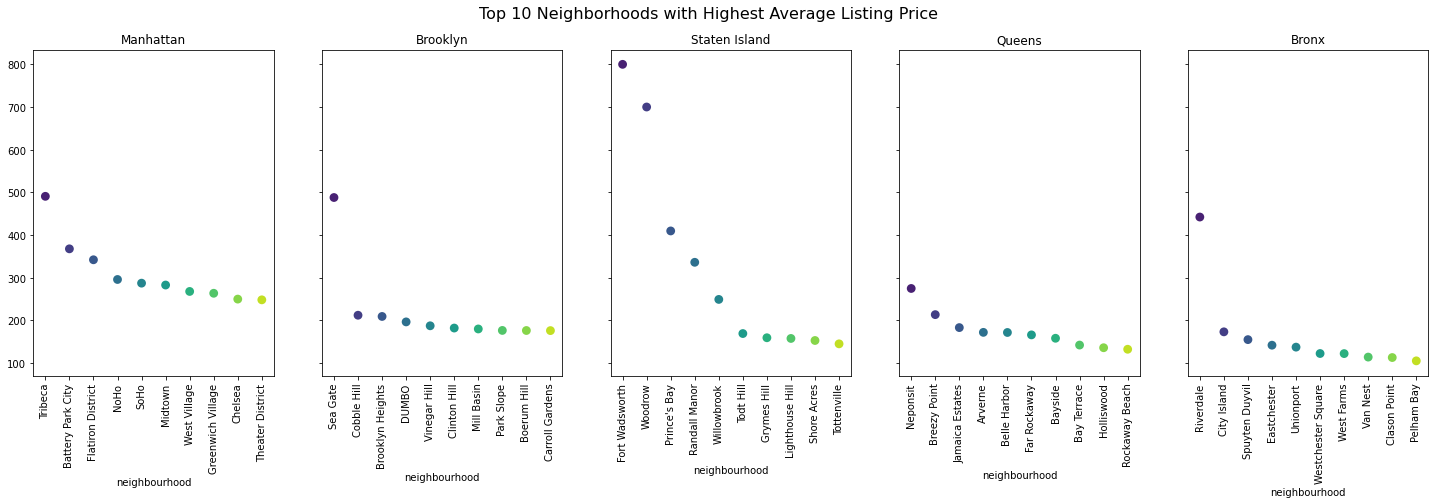

In [169]:
# visualize top 10 neighborhoods with highest average price within each neighborhood group
fig,axes = plt.subplots(nrows=1,ncols=5,sharey=True,figsize=(25,6))
fig.suptitle('Top 10 Neighborhoods with Highest Average Listing Price', fontsize=16)
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    ax.yaxis.label.set_visible(False)
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Manhattan'],ax=axes[0],palette='viridis')
axes[0].set_title('Manhattan')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Brooklyn'],ax=axes[1],palette='viridis')
axes[1].set_title('Brooklyn')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Staten Island'],ax=axes[2],palette='viridis')
axes[2].set_title('Staten Island')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Queens'],ax=axes[3],palette='viridis')
axes[3].set_title('Queens')
sns.pointplot(x='neighbourhood',y='price_avg',data=highest10[highest10['neighbourhood_group']=='Bronx'],ax=axes[4],palette='viridis')
axes[4].set_title('Bronx')

Text(0, 0.5, 'Frequency')

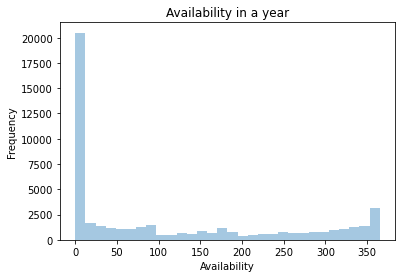

In [147]:
# check the distribution of listing availability
sns.distplot(airbnb['availability_365'],kde=False)
plt.title('Availability in a year')
plt.xlabel('Availability')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Price v.s. Availability in a year')

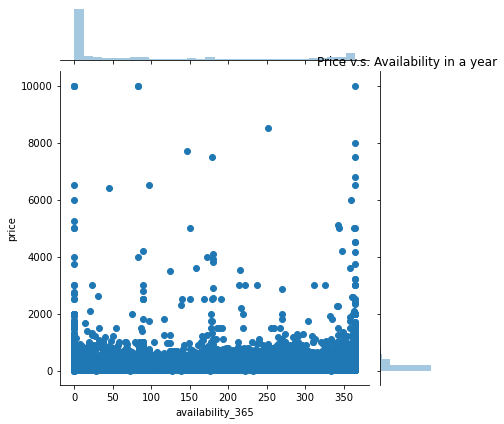

In [148]:
# Is there a pattern between price and availability? let's explore with jointplot
sns.jointplot(x='availability_365',y='price',data=airbnb)
plt.title('Price v.s. Availability in a year')

Text(0.5, 1.0, 'Price v.s. Availability in a year')

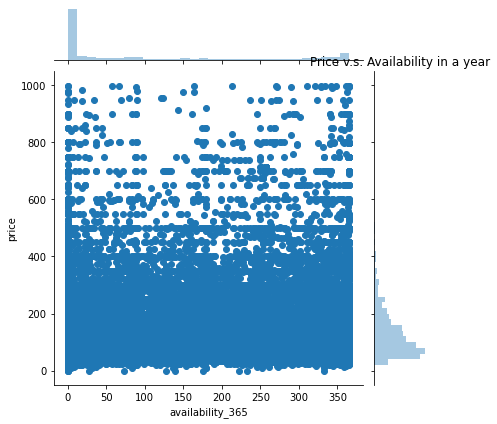

In [149]:
# let's zoom out and take a closer look
sns.jointplot(x='availability_365',y='price',data=airbnb[airbnb['price']<1000])
plt.title('Price v.s. Availability in a year')
# the answer to the above question is: no

Text(0, 0.5, 'Price')

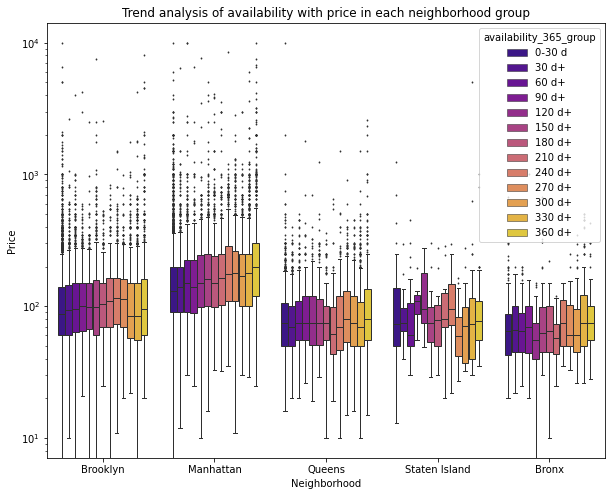

In [150]:
# next let's do a trend analysis of availability between neighborhood groups
airbnb['availability_365_group_int'] = airbnb['availability_365']//30 * 30
airbnb['availability_365_group'] = airbnb['availability_365_group_int'].apply(lambda x: '0-30 d' if x == 0 else (str(x) + ' d+'))

plt.figure(figsize=(10,8))
g = sns.boxplot(x='neighbourhood_group',y='price',data=airbnb,hue='availability_365_group',dodge=True,palette='plasma',fliersize=1,linewidth=1,
              hue_order=['0-30 d','30 d+','60 d+','90 d+','120 d+','150 d+','180 d+','210 d+','240 d+','270 d+','300 d+','330 d+','360 d+'])
g.set(yscale='log')
plt.title('Trend analysis of availability with price in each neighborhood group')
plt.xlabel('Neighborhood')
plt.ylabel('Price')

From the above boxplot we can see there is a weak trend that the higher the price, the more available(vacant) the listing will be on the market.

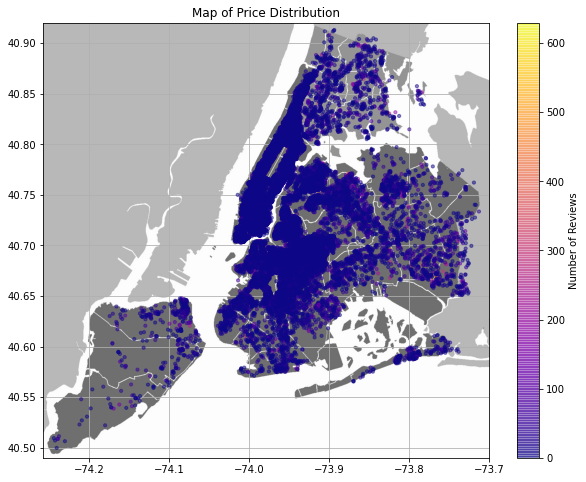

In [171]:
# check the distribution of review numbers
plt.figure(figsize=(10,8))
map_img = plt.imread('../input/new-york-city-airbnb-open-data/New_York_City_.png',0)
plt.imshow(map_img,zorder=1,aspect='auto',extent=[-74.258, -73.7, 40.49, 40.92])
g = plt.scatter(x=airbnb['longitude'],y=airbnb['latitude'],c=airbnb['number_of_reviews'],cmap=plt.get_cmap('plasma'),alpha=0.5,s=10,zorder=2)
plt.title('Map of Price Distribution')
plt.colorbar(g).set_label('Number of Reviews')
plt.grid(True)

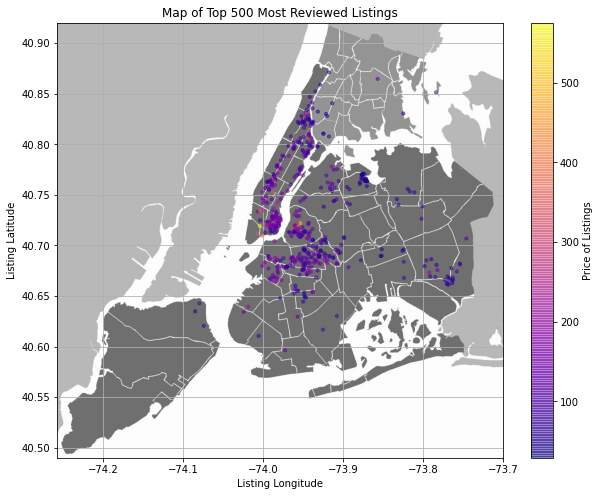

In [152]:
# top 500 most reviewed listings and their locations
most_reviewed_500 = airbnb.sort_values(by='number_of_reviews',ascending=False)[:500][['host_id','number_of_reviews','latitude','longitude','price']]
plt.figure(figsize=(10,8))
map_img = plt.imread('../input/new-york-city-airbnb-open-data/New_York_City_.png', 0)
plt.imshow(map_img, zorder=1, aspect='auto', extent=[-74.258, -73.7, 40.49, 40.92])
g = plt.scatter(x=most_reviewed_500['longitude'],y=most_reviewed_500['latitude'],c=most_reviewed_500['price'],cmap=plt.get_cmap('plasma'),alpha=0.5,s=10,zorder=2)
plt.title('Map of Top 500 Most Reviewed Listings')
plt.xlabel('Listing Longitude')
plt.ylabel('Listing Latitude')
plt.colorbar(g).set_label('Price of Listings')
plt.grid(True)

It looks top reviewed listings are mostly located in Manhattan and North Brooklyn.

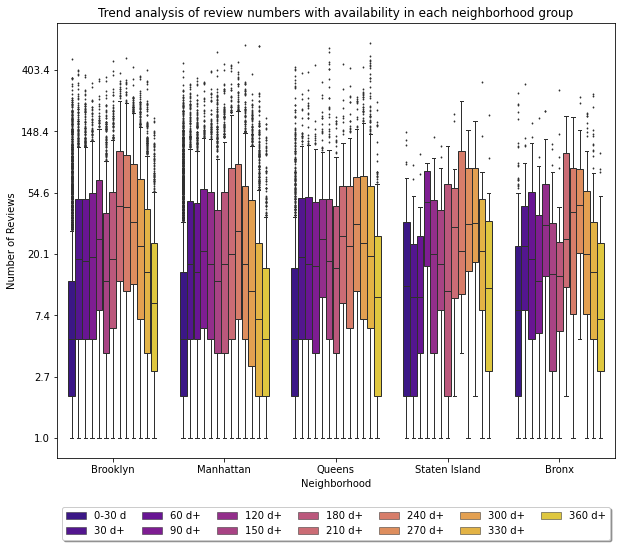

In [153]:
# check how number of reviews variate along with different availability groups
import matplotlib.ticker as mtick

plt.figure(figsize=(10,8))
# sns.swarmplot(x='neighbourhood_group',y='number_of_reviews',data=airbnb[airbnb['price']<600],hue='availability_365_group',dodge=True,palette='plasma',size=2,hue_order=['0-30 d','30 d+','60 d+','90 d+','120 d+','150 d+','180 d+','210 d+','240 d+','270 d+','300 d+','330 d+','360 d+'])
# swarmplot doesn't give a clear picture of how review numbers variate between different groups of availability
g = sns.boxplot(x='neighbourhood_group',y='number_of_reviews',data=airbnb[airbnb['number_of_reviews']>0],hue='availability_365_group',dodge=True,palette='plasma',fliersize=1,linewidth=1,
              hue_order=['0-30 d','30 d+','60 d+','90 d+','120 d+','150 d+','180 d+','210 d+','240 d+','270 d+','300 d+','330 d+','360 d+'])
g.set_yscale('log',basey=np.e)
g.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))
plt.title('Trend analysis of review numbers with availability in each neighborhood group')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Reviews')
plt.legend(loc="lower left",ncol=airbnb['availability_365_group'].nunique()//2+1,mode='expand',fancybox = True, shadow = True,bbox_to_anchor=(0,-0.2,1,0.2))

There isn't a clear trend here. It seems that listings with more reviews tend to be more available on the market. Is it because more negative reviews are given and displayed?

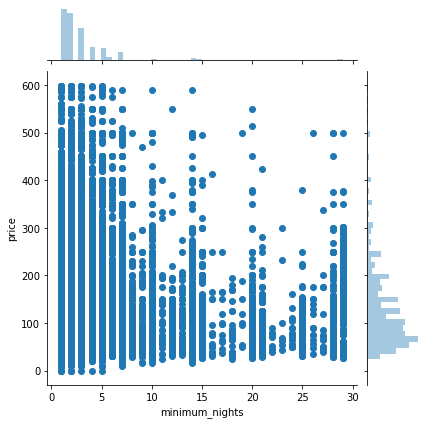

In [154]:
# for convenience we ignore outliers from price and minimum_nights columns
sns.jointplot(x='minimum_nights',y='price',data=airbnb[(airbnb['price']<600) & (airbnb['minimum_nights']<30)])

It seems that extreme high priced listings tend to ask for a smaller minimum_nights of stay, though from correlation matrix we don't see such negative correlation between price and minimum_nights.

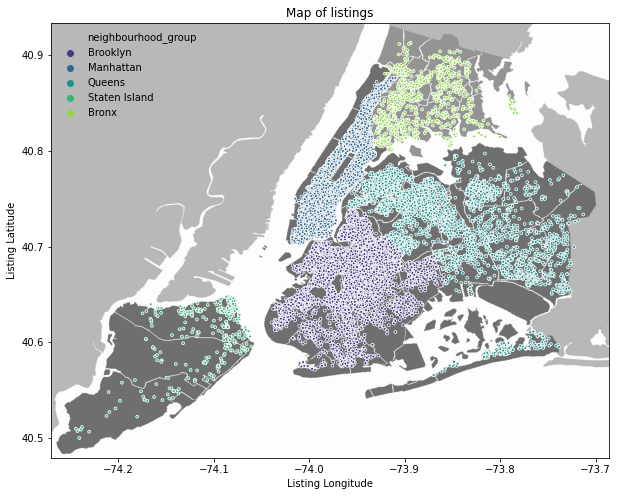

In [155]:
# now let's exam the location of listings, and display the locations on the NYC map
plt.figure(figsize=(10,8))
g = sns.scatterplot(x='longitude',y='latitude',data=airbnb,hue='neighbourhood_group',s=8,palette='viridis',zorder=2)
map_img = plt.imread('../input/new-york-city-airbnb-open-data/New_York_City_.png',0)
g.imshow(map_img,zorder=1,extent=g.get_xlim() + g.get_ylim(),aspect=g.get_aspect())
plt.title('Map of listings')
plt.legend(title='Neighbourhood Groups')
plt.xlabel('Listing Longitude')
plt.ylabel('Listing Latitude')
plt.legend(frameon=False)

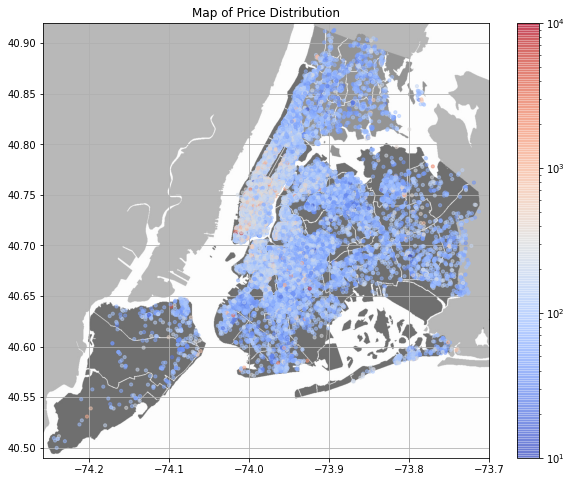

In [156]:
# price distribution on the map
plt.figure(figsize=(10,8))
map_img = plt.imread('../input/new-york-city-airbnb-open-data/New_York_City_.png',0)
plt.imshow(map_img,zorder=1,aspect='auto',extent=[-74.258, -73.7, 40.49, 40.92])
g = plt.scatter(x=airbnb['longitude'],y=airbnb['latitude'],c=airbnb['price'],cmap=plt.get_cmap('coolwarm'),alpha=0.5,s=10,zorder=2,norm=matplotlib.colors.LogNorm())
plt.title('Map of Price Distribution')
plt.colorbar(g)
plt.grid(True)

In [157]:
# let's exam the average price a host posts on all his/her listings
listing_mean_price = airbnb[airbnb['calculated_host_listings_count']<50].groupby(['host_id','calculated_host_listings_count'],sort=False)['price'].agg([('price_avg','mean')]).reset_index().sort_values(by=['calculated_host_listings_count','price_avg'])
print(listing_mean_price.head())

        host_id  calculated_host_listings_count  price_avg
21436  10132166                               1        0.0
21796  13709292                               1        0.0
18180  33511962                               1       10.0
18614  62685070                               1       10.0
18632  84497333                               1       10.0


[None]

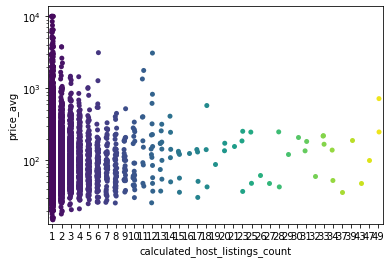

In [158]:
# let's first do a stripplot to see how host listings count distribute
g = sns.stripplot(x='calculated_host_listings_count',y='price_avg',data=listing_mean_price,palette='viridis')
g.set(yscale='log')

[None]

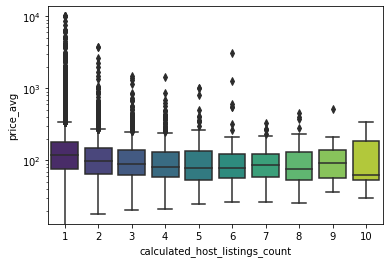

In [159]:
# from above we can see most hosts own less than 10 listings. Let's take a closer look at those hosts with 10 or less listings
g = sns.boxplot(x='calculated_host_listings_count',y='price_avg',data=listing_mean_price[listing_mean_price['calculated_host_listings_count']<11],palette='viridis')
g.set(yscale='log')

*From above we can see there is a slight trend that: when a host owns 5 or less listings, the average price of listings tend to descrease along with increase of number of listings. When a host owns 6 or more listings, the average price of listings tend to increase along with increase of number of listings. Maybe because middle class have limited budget while rich people tend to invest in more real estates with higher prices?*

# Prediction

Before we start prediction, one thing to point out is that we are missing some other important features such as average rating of listings. Compared to number of reviews or reviews per month, I think the average rating is a more relevant factor to the price of listings. Also, it'd be great if the dataset contains data on things like parking, gym, in-unit washer/dryer, etc. 
With above said, we can expect the result of the models might not be robust as the dataset isn't comprehensive... 

In [160]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [161]:
airbnb_prep = pd.read_csv('../input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')
airbnb_prep.drop(['id','name','host_name','last_review'],axis=1,inplace=True) # since we drop name, host_name and last_review, we no longer need to care about missing values from these columns
airbnb_prep['reviews_per_month'] = airbnb_prep['reviews_per_month'].fillna(value=0,inplace=False)

In [162]:
le = preprocessing.LabelEncoder()
le.fit(airbnb_prep['neighbourhood_group'])
airbnb_prep['neighbourhood_group'] = le.transform(airbnb_prep['neighbourhood_group'])
le.fit(airbnb_prep['neighbourhood'])
airbnb_prep['neighbourhood'] = le.transform(airbnb_prep['neighbourhood'])
le.fit(airbnb_prep['room_type'])
airbnb_prep['room_type'] = le.transform(airbnb_prep['room_type'])

In [163]:
airbnb_prep.sort_values(by='price',ascending=True,inplace=True)
print(airbnb_prep.head())

         host_id  neighbourhood_group  neighbourhood  latitude  longitude  ...  minimum_nights  number_of_reviews  reviews_per_month  calculated_host_listings_count  availability_365
25796   86327101                    1             13  40.68258  -73.91284  ...               1                 95               4.35                               6               222
25634   15787004                    1             28  40.69467  -73.92433  ...               2                 16               0.71                               5                 0
25433  131697576                    0             62  40.83296  -73.88668  ...               2                 55               2.56                               4               127
25753    1641537                    1             91  40.72462  -73.94072  ...               2                 12               0.53                               2                 0
23161    8993084                    1             13  40.69023  -73.95428  ...       

In [164]:
X = airbnb_prep.drop(['price'],axis=1,inplace=False)
y = airbnb_prep['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [165]:
lm = LinearRegression()
lm.fit(X_train,y_train)
# predict y using trained model
y_pred = lm.predict(X_test)
# get evaluation matrix
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
      """.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred)),
    metrics.r2_score(y_test,y_pred)*100,
    metrics.mean_absolute_error(y_test,y_pred)
))


        Mean Squared Error: 180.7340965693626
        R2 Score: 11.63957678232357
        Mean Absolute Error: 72.86091366825617
      


   Actual Values  Predicted Values
0            400        135.112125
1            140        210.599057
2            195        176.222978
3            120        100.439183
4             88         88.545753
5            130        223.765029
6            235        228.356044
7             70        157.929920
8            225        219.969499
9            125        116.359776


Text(0, 0.5, 'Test')

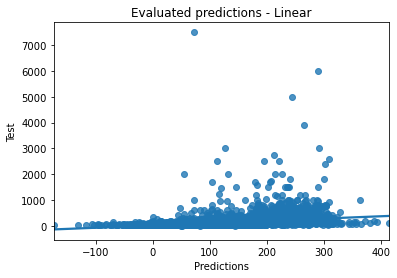

In [166]:
linear_error = pd.DataFrame({'Actual Values':np.array(y_test).flatten(),
                             'Predicted Values':y_pred.flatten()})
print(linear_error.head(10))
sns.regplot(x=y_pred,y=y_test)
plt.title('Evaluated predictions - Linear')
plt.xlabel('Predictions')
plt.ylabel('Test')

In [167]:
GBoost = GradientBoostingRegressor()
GBoost.fit(X_train,y_train)
# predict y using trained model
y_pred2 = GBoost.predict(X_test)
# get evaluation matrix
print("""
        Mean Squared Error: {}
        R2 Score: {}
        Mean Absolute Error: {}
      """.format(
    np.sqrt(metrics.mean_squared_error(y_test,y_pred2)),
    metrics.r2_score(y_test,y_pred2)*100,
    metrics.mean_absolute_error(y_test,y_pred2)
))


        Mean Squared Error: 175.50664471925975
        R2 Score: 16.677032359191124
        Mean Absolute Error: 64.16593804163138
      


   Actual Values  Predicted Values
0            400        135.198064
1            140        162.252068
2            195        160.202585
3            120         92.887260
4             88         76.627596
5            130        217.863189
6            235        268.216346
7             70        150.316905
8            225        310.484377
9            125        140.322092


Text(0, 0.5, 'Test')

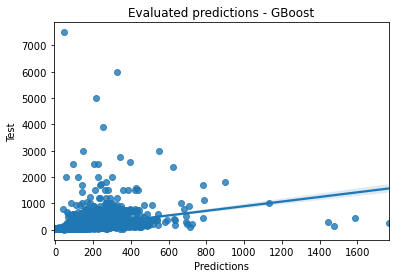

In [168]:
gboost_error = pd.DataFrame({'Actual Values':np.array(y_test).flatten(),
                             'Predicted Values':y_pred2.flatten()})
print(gboost_error.head(10))
sns.regplot(x=y_pred2,y=y_test)
plt.title('Evaluated predictions - GBoost')
plt.xlabel('Predictions')
plt.ylabel('Test')

# Summary

This is a good project for data visualization practice with Python. As we mentioned earlier, it's not a good project to practice modelling skills as it misses certain data dimensions. 

In this practice, we utilized visualization techniques to explore distribution of each data feature as well as relations between different features. We also made good use of the latitude and longitude columns to generate geographical heatmap color-coded by features such as price, number of reviews.

Another thing we could do is apply natural language processing techniques to study the most frequency words hosts use to name and describe their listings, and to further study on the relationship between the frequent words and the number of reviews. In the dataset we only have name feature of listings, it could be helpful if the dataset has a column for description of listings. 

Overall, we discovered a few interesting relations between features, and raised a couple questions worth further discussion.